In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Crime Economics - data.csv')
df

,Country,Crime Rate,Unemployment (%),HDI,Population Density (per sq. km),Weapons per 100 persons,Per Capita Income,Gini Coefficient,Literacy Rate,Happiness Index
0,Afghanistan,76.31,11.2,0.51,57.00,12.5,508.00,27.8,0.38,2.52
1,Albania,42.53,11.3,0.80,100.00,12.0,"5,181.00",33.2,0.98,5.12
2,Algeria,52.03,11.5,0.75,18.00,2.1,"3,368.00",27.6,0.80,4.89
3,Argentina,63.82,7.0,0.85,16.00,7.4,"8,476.00",41.4,0.98,5.93
4,Armenia,22.79,7.7,0.78,99.00,6.1,"4,266.00",34.4,1.00,5.28
...,...,...,...,...,...,...,...,...,...,...
109,Uzbekistan,33.42,8.9,0.72,73.00,0.4,"1,724.00",39.7,1.00,6.18
110,Venezuela,83.76,9.4,0.71,32.00,18.5,"3,740.00",46.9,0.95,4.89
111,Vietnam,46.19,8.8,0.70,289.00,1.6,"2,786.00",35.7,0.95,5.41
112,Zambia,43.62,11.4,0.58,23.00,0.9,985.00,57.1,0.63,4.07


In [6]:
df.drop(df[df['Crime Rate'] <= 60.0].index, inplace = True)
df = df.reset_index()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   level_0                          16 non-null     int64  
 1   index                            16 non-null     int64  
 2   Country                          16 non-null     object 
 3   Crime Rate                       16 non-null     float64
 4   Unemployment (%)                 16 non-null     float64
 5   HDI                              16 non-null     float64
 6   Population Density (per sq. km)  16 non-null     object 
 7   Weapons per 100 persons          16 non-null     float64
 8   Per Capita Income                16 non-null     object 
 9   Gini Coefficient                 16 non-null     float64
 10  Literacy Rate                    16 non-null     float64
 11  Happiness Index                  16 non-null     float64
dtypes: float64(7), int64(2),

,level_0,index,Country,Crime Rate,Unemployment (%),HDI,Population Density (per sq. km),Weapons per 100 persons,Per Capita Income,Gini Coefficient,Literacy Rate,Happiness Index
0,0,0,Afghanistan,76.31,11.20,0.51,57.00,12.50,508.00,27.80,0.38,2.52
1,1,3,Argentina,63.82,7.00,0.85,16.00,7.40,"8,476.00",41.40,0.98,5.93
2,2,8,Bangladesh,63.90,4.20,0.63,"1,087.00",0.40,"2,001.00",32.40,0.76,5.03
3,3,13,Brazil,67.49,2.90,0.77,25.00,8.30,"6,797.00",53.30,0.92,6.33
4,4,16,Cameroon,65.24,3.40,0.56,53.00,2.10,"1,502.00",46.60,0.75,5.14
5,5,26,Dominican Republic,61.02,5.90,0.76,221.00,7.40,"7,268.00",43.70,0.92,5.55
6,6,29,El Salvador,67.79,4.20,0.67,305.00,12.00,"3,799.00",38.60,0.75,6.06
7,7,39,Honduras,74.54,5.20,0.63,85.00,14.10,"2,406.00",52.10,0.89,5.92
8,8,50,Jamaica,67.42,7.90,0.73,267.00,8.80,"4,665.00",45.50,0.89,6.31
9,9,54,Kenya,60.14,2.60,0.60,87.00,1.50,"1,879.00",40.80,0.78,4.61


In [7]:
pd.options.display.float_format="{:,.2f}".format
df.describe(percentiles= [0.05,.1,.2,.3,.4,.5,.6])

,level_0,index,Crime Rate,Unemployment (%),HDI,Weapons per 100 persons,Gini Coefficient,Literacy Rate,Happiness Index
count,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00
mean,7.50,45.56,67.88,9.99,0.68,8.54,46.15,0.82,5.24
std,4.76,34.23,6.61,9.12,0.09,5.54,11.10,0.16,0.94
min,0.00,0.00,60.14,2.60,0.51,0.40,27.80,0.38,2.52
5%,0.75,2.25,60.80,2.68,0.53,1.23,31.25,0.54,4.06
10%,1.50,5.50,61.40,2.80,0.55,1.75,33.75,0.68,4.59
20%,3.00,13.00,63.82,3.40,0.60,2.10,38.60,0.75,4.76
30%,4.50,21.00,63.98,4.20,0.63,5.30,41.10,0.77,4.92
40%,6.00,29.00,65.21,5.20,0.65,7.40,42.80,0.82,5.03
50%,7.50,44.50,65.98,6.45,0.69,8.55,44.60,0.89,5.28


In [8]:
variables = df[['Country','Crime Rate', 'Unemployment (%)','Weapons per 100 persons','Literacy Rate','Happiness Index']]
variables

,Country,Crime Rate,Unemployment (%),Weapons per 100 persons,Literacy Rate,Happiness Index
0,Afghanistan,76.31,11.20,12.50,0.38,2.52
1,Argentina,63.82,7.00,7.40,0.98,5.93
2,Bangladesh,63.90,4.20,0.40,0.76,5.03
3,Brazil,67.49,2.90,8.30,0.92,6.33
4,Cameroon,65.24,3.40,2.10,0.75,5.14
5,Dominican Republic,61.02,5.90,7.40,0.92,5.55
6,El Salvador,67.79,4.20,12.00,0.75,6.06
7,Honduras,74.54,5.20,14.10,0.89,5.92
8,Jamaica,67.42,7.90,8.80,0.89,6.31
9,Kenya,60.14,2.60,1.50,0.78,4.61


In [9]:
variables.loc[variables['Country'] == 'Afghanistan']

,Country,Crime Rate,Unemployment (%),Weapons per 100 persons,Literacy Rate,Happiness Index
0,Afghanistan,76.31,11.20,12.50,0.38,2.52


In [10]:
variables.loc[variables['Country'] == 'Namibia']

,Country,Crime Rate,Unemployment (%),Weapons per 100 persons,Literacy Rate,Happiness Index
11,Namibia,65.21,23.00,15.40,0.82,4.57


In [11]:
index_list = [0,11]
variables.loc[variables.index[index_list]]

,Country,Crime Rate,Unemployment (%),Weapons per 100 persons,Literacy Rate,Happiness Index
0,Afghanistan,76.31,11.20,12.50,0.38,2.52
11,Namibia,65.21,23.00,15.40,0.82,4.57


In [12]:
variable_filtered1 = variables[df['Unemployment (%)'] >= 9.99 ]
variable_filtered1

,Country,Crime Rate,Unemployment (%),Weapons per 100 persons,Literacy Rate,Happiness Index
0,Afghanistan,76.31,11.20,12.50,0.38,2.52
10,Libya,61.78,18.60,13.30,0.91,5.41
11,Namibia,65.21,23.00,15.40,0.82,4.57
13,Peru,66.72,16.40,2.00,0.95,5.84
14,South Africa,76.86,35.30,9.70,0.94,4.96


In [13]:
variable_filtered2 = variables[df['Weapons per 100 persons'] >= 8.54 ]
variable_filtered2

,Country,Crime Rate,Unemployment (%),Weapons per 100 persons,Literacy Rate,Happiness Index
0,Afghanistan,76.31,11.20,12.50,0.38,2.52
6,El Salvador,67.79,4.20,12.00,0.75,6.06
7,Honduras,74.54,5.20,14.10,0.89,5.92
8,Jamaica,67.42,7.90,8.80,0.89,6.31
10,Libya,61.78,18.60,13.30,0.91,5.41
11,Namibia,65.21,23.00,15.40,0.82,4.57
14,South Africa,76.86,35.30,9.70,0.94,4.96
15,Venezuela,83.76,9.40,18.50,0.95,4.89


In [14]:
variable_filtered3 = variables[df['Literacy Rate'] <= 0.82 ]
variable_filtered3

,Country,Crime Rate,Unemployment (%),Weapons per 100 persons,Literacy Rate,Happiness Index
0,Afghanistan,76.31,11.20,12.50,0.38,2.52
2,Bangladesh,63.90,4.20,0.40,0.76,5.03
4,Cameroon,65.24,3.40,2.10,0.75,5.14
6,El Salvador,67.79,4.20,12.00,0.75,6.06
9,Kenya,60.14,2.60,1.50,0.78,4.61
11,Namibia,65.21,23.00,15.40,0.82,4.57
12,Nigeria,64.06,2.70,3.20,0.60,4.76


In [15]:
variable_filtered4 = variables[df['Unemployment (%)'] <= 5.24 ]
variable_filtered4

,Country,Crime Rate,Unemployment (%),Weapons per 100 persons,Literacy Rate,Happiness Index
2,Bangladesh,63.90,4.20,0.40,0.76,5.03
3,Brazil,67.49,2.90,8.30,0.92,6.33
4,Cameroon,65.24,3.40,2.10,0.75,5.14
6,El Salvador,67.79,4.20,12.00,0.75,6.06
7,Honduras,74.54,5.20,14.10,0.89,5.92
9,Kenya,60.14,2.60,1.50,0.78,4.61
12,Nigeria,64.06,2.70,3.20,0.60,4.76


In [17]:
df3=pd.merge(variable_filtered1,variable_filtered2, on='Country') 
df3

,Country,Crime Rate_x,Unemployment (%)_x,Weapons per 100 persons_x,Literacy Rate_x,Happiness Index_x,Crime Rate_y,Unemployment (%)_y,Weapons per 100 persons_y,Literacy Rate_y,Happiness Index_y
0,Afghanistan,76.31,11.20,12.50,0.38,2.52,76.31,11.20,12.50,0.38,2.52
1,Libya,61.78,18.60,13.30,0.91,5.41,61.78,18.60,13.30,0.91,5.41
2,Namibia,65.21,23.00,15.40,0.82,4.57,65.21,23.00,15.40,0.82,4.57
3,South Africa,76.86,35.30,9.70,0.94,4.96,76.86,35.30,9.70,0.94,4.96


In [18]:
df4=pd.merge(variable_filtered3,variable_filtered4, on='Country') 
df4

,Country,Crime Rate_x,Unemployment (%)_x,Weapons per 100 persons_x,Literacy Rate_x,Happiness Index_x,Crime Rate_y,Unemployment (%)_y,Weapons per 100 persons_y,Literacy Rate_y,Happiness Index_y
0,Bangladesh,63.90,4.20,0.40,0.76,5.03,63.90,4.20,0.40,0.76,5.03
1,Cameroon,65.24,3.40,2.10,0.75,5.14,65.24,3.40,2.10,0.75,5.14
2,El Salvador,67.79,4.20,12.00,0.75,6.06,67.79,4.20,12.00,0.75,6.06
3,Kenya,60.14,2.60,1.50,0.78,4.61,60.14,2.60,1.50,0.78,4.61
4,Nigeria,64.06,2.70,3.20,0.60,4.76,64.06,2.70,3.20,0.60,4.76


In [19]:
frames = [df3, df4]

In [20]:
result = pd.concat(frames)
display(result)

,Country,Crime Rate_x,Unemployment (%)_x,Weapons per 100 persons_x,Literacy Rate_x,Happiness Index_x,Crime Rate_y,Unemployment (%)_y,Weapons per 100 persons_y,Literacy Rate_y,Happiness Index_y
0,Afghanistan,76.31,11.20,12.50,0.38,2.52,76.31,11.20,12.50,0.38,2.52
1,Libya,61.78,18.60,13.30,0.91,5.41,61.78,18.60,13.30,0.91,5.41
2,Namibia,65.21,23.00,15.40,0.82,4.57,65.21,23.00,15.40,0.82,4.57
3,South Africa,76.86,35.30,9.70,0.94,4.96,76.86,35.30,9.70,0.94,4.96
0,Bangladesh,63.90,4.20,0.40,0.76,5.03,63.90,4.20,0.40,0.76,5.03
1,Cameroon,65.24,3.40,2.10,0.75,5.14,65.24,3.40,2.10,0.75,5.14
2,El Salvador,67.79,4.20,12.00,0.75,6.06,67.79,4.20,12.00,0.75,6.06
3,Kenya,60.14,2.60,1.50,0.78,4.61,60.14,2.60,1.50,0.78,4.61
4,Nigeria,64.06,2.70,3.20,0.60,4.76,64.06,2.70,3.20,0.60,4.76


<AxesSubplot:>

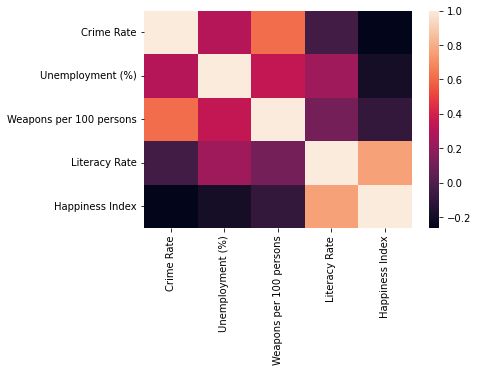

In [21]:
d=variables.corr()
sns.heatmap(d)